# Q2 - Assignment 9 | ME7223
## Saarthak Marathe - ME17B162

In [28]:
import numpy as np
import matplotlib.pyplot as plt
from sympy import symbols, solve
from scipy.optimize import minimize
import scipy
import math
import matplotlib.pyplot as plt

In [29]:
def f(x):
    return (x[0]-1)**2+(x[1]-2)**2

def g1(x):
    return 2*x[0]-x[1]

def g2(x):
    return x[0]-5

def diff_f(x):
    df0 = 2*(x[0]-1)
    df1 = 2*(x[1]-2)
    return np.array([df0,df1])


def norm(x):
    return math.sqrt(x[0]**2 + x[1]**2)

def penalty_inner(x, k):
    if g2(x) != 0:
        g2_coeff = 1 / g2(x)
        h_coeff = g1(x)**2
        return f(x) - k * g2_coeff + (1/math.sqrt(k))*h_coeff

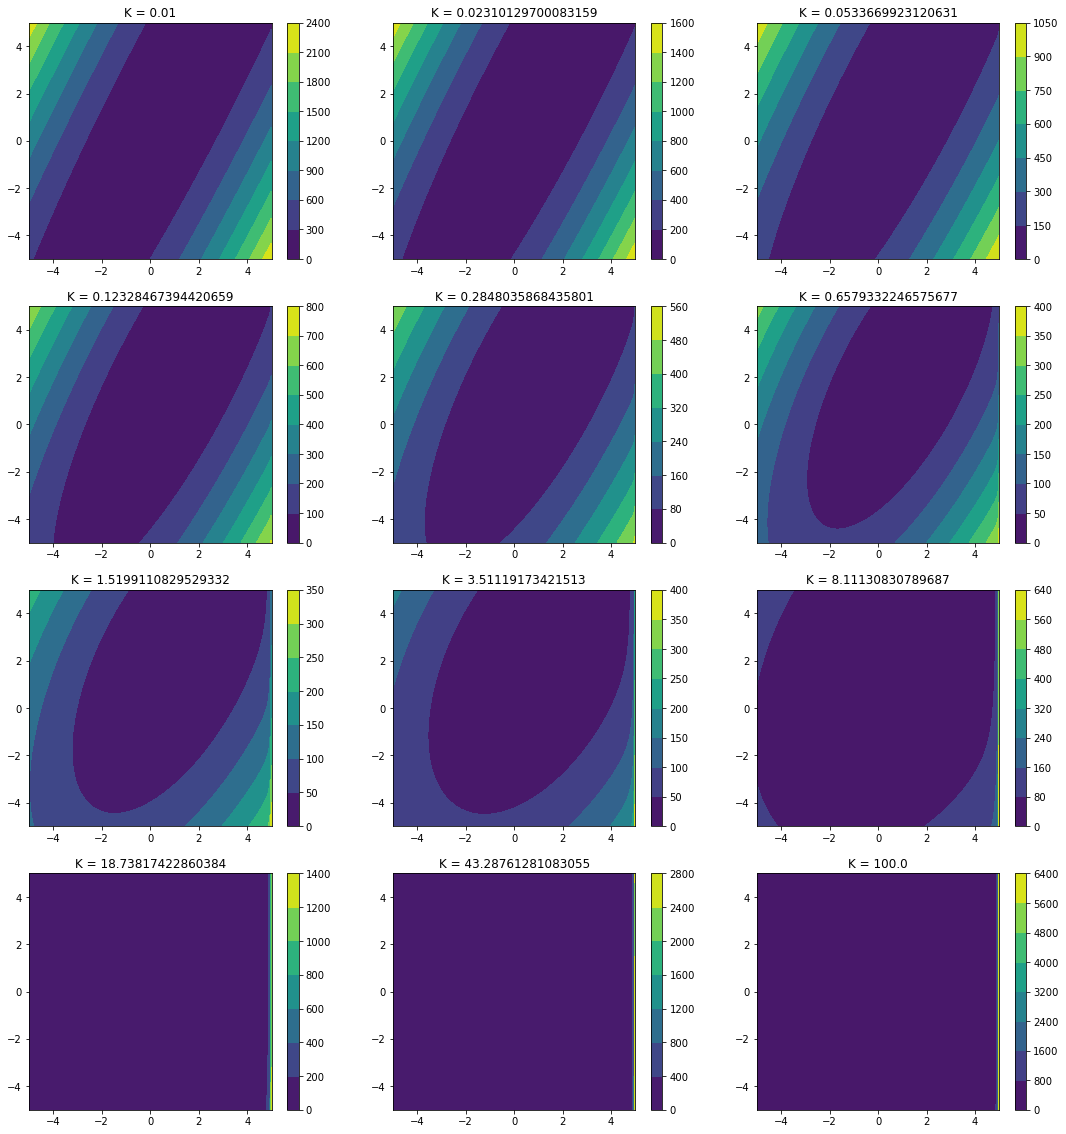

In [25]:
xmin = -5
xmax = 5
ymin = -5
ymax = 5
x = np.linspace(xmin, xmax, 600)
y = np.linspace(ymin, ymax, 600)
xx, yy = np.meshgrid(x, y)

arr = np.linspace(-10, 10,12)
k_arr = 10**(0.2*arr)
k_arr = np.reshape(k_arr, (4,3))

fig = plt.figure(figsize=(25, 20))
for i in range(k_arr.shape[0]):
    for j in range(k_arr.shape[1]):
        zz = np.array([penalty_inner(xy, k_arr[i,j]) for xy in np.c_[xx.ravel(), yy.ravel()]]).reshape(xx.shape)
        fig.add_subplot(4, 4, 4*i + j + 1)
        plt.contourf(xx, yy, zz)
        plt.colorbar()
        plt.title('K = '+ str(k_arr[i,j]))
plt.show()

From the above graphs we can see that k=0.01 gives us the best sepearation of all. We take initial k as 0.01 and decay as 0.8 for the following loop calculations.

In [30]:
x = [1,3]
print(0, '- Coordinate:', x, '- Objective Function:', f(x))
i = 0
max_iter = 20
eps = 2e-5
err = norm(diff_f(x))
k = 0.01
k_decay = 0.8
penalty_f = lambda x: penalty_inner(x, k)

while err > eps and i<max_iter:
    residual = minimize(penalty_f, x)
    x_new = residual['x']
    x = x_new
    err = norm(diff_f(x))
    i =i+1
    k = k_decay * k
    print(i, '- Coordinate:', x, '- Objective Function:', f(x), 'K value:', k)

0 - Coordinate: [1, 3] - Objective Function: 1
1 - Coordinate: [0.99993263 1.99987757] - Objective Function: 1.95274887492948e-08 K value: 0.008
2 - Coordinate: [0.99994638 1.99990155] - Objective Function: 1.256708057129708e-08 K value: 0.0064
3 - Coordinate: [0.99995736 1.99992103] - Objective Function: 8.054173993510262e-09 K value: 0.00512
4 - Coordinate: [0.99996606 1.99993665] - Objective Function: 5.165421568093203e-09 K value: 0.004096000000000001
5 - Coordinate: [0.99997296 1.99994916] - Objective Function: 3.3158283980181075e-09 K value: 0.0032768000000000007
6 - Coordinate: [0.99997843 1.99995918] - Objective Function: 2.131221718634862e-09 K value: 0.002621440000000001
7 - Coordinate: [0.99998277 1.99996721] - Objective Function: 1.372216871923736e-09 K value: 0.002097152000000001
8 - Coordinate: [0.99998428 1.99996973] - Objective Function: 1.163118648403769e-09 K value: 0.001677721600000001
9 - Coordinate: [0.99998806 1.99997697] - Objective Function: 6.729897936556962e-1